<a href="https://colab.research.google.com/github/ambicapvs/ambica_info5731_spring2021/blob/main/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [18]:
#load the data
import pandas as pd
sample=pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
sample = sample.head(500)
sample

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
495,4G-Unlocked Huawei Honor 6 5.0 TFT LTPS Screen...,Huawei,161.06,5,good phone with a top hardware and relative lo...,1.0
496,"5.0"" Cell Phones Unlocked Android 5.1 MTK6580 ...",JUNING,89.99,5,Like phone its nice for price sometimes it get...,1.0
497,"5.0"" Cell Phones Unlocked Android 5.1 MTK6580 ...",JUNING,89.99,4,So to be put to use by the beneficiary,0.0
498,"5.0"" Cell Phones Unlocked Android 5.1 MTK6580 ...",JUNING,89.99,1,Attractive phone but did not work upon arrival...,5.0


In [19]:
#check the loaded data
print(sample.shape)

(500, 6)


In [20]:
#look of the dataset
sample.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [21]:
#removing null values
sample = sample.dropna()
sample

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
495,4G-Unlocked Huawei Honor 6 5.0 TFT LTPS Screen...,Huawei,161.06,5,good phone with a top hardware and relative lo...,1.0
496,"5.0"" Cell Phones Unlocked Android 5.1 MTK6580 ...",JUNING,89.99,5,Like phone its nice for price sometimes it get...,1.0
497,"5.0"" Cell Phones Unlocked Android 5.1 MTK6580 ...",JUNING,89.99,4,So to be put to use by the beneficiary,0.0
498,"5.0"" Cell Phones Unlocked Android 5.1 MTK6580 ...",JUNING,89.99,1,Attractive phone but did not work upon arrival...,5.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


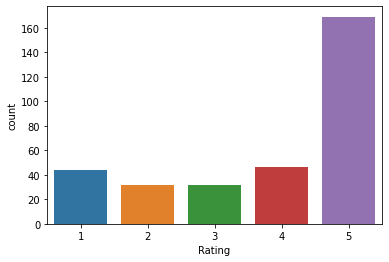

In [22]:
# Understand how customer ratings are distributed
import seaborn as sns
sns.countplot(sample.Rating)

In [23]:
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive
actualScore = sample['Rating']
positiveNegative = actualScore.map(partition) 
sample['Rating'] = positiveNegative

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [25]:
sample.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0


In [26]:
#counting number of positive and negative ratings
sample["Rating"].value_counts()

positive    247
negative     76
Name: Rating, dtype: int64

In [27]:
#dropping  the duplicates column if any using drop duplicates from pandas
sorted_data=sample.sort_values('Product Name', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
final=sorted_data.drop_duplicates(subset={"Brand Name","Reviews"}, keep='first', inplace=False)
final.shape

(302, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


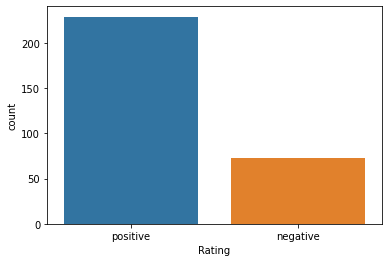

In [28]:
#datacleaning
import seaborn as sns
sns.countplot(final.Rating)

In [29]:
#removing html tags
import re
i=0;
for sent in final['Reviews'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;
final

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0
21,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"pros-beautiful screen,capable of running chrom...",0.0
22,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,negative,I purchased this phone in December as a christ...,19.0
23,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Phone good just a little slow phone old but it...,0.0
24,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Phone's speaker little low. Overall very happy...,0.0
...,...,...,...,...,...,...
166,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,positive,everything was great. had a hard time getting ...,0.0
165,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,positive,[New Edition] Jethro [SC213V2] Flip Quad-band ...,0.0
164,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,negative,"I was contacting Jethro customer service, beca...",1.0
173,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,positive,Bought for my mom! She loves it!,8.0


In [30]:
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

cleanhtml

<function __main__.cleanhtml>

In [31]:
#extract stopwords
import requests
data = requests.get("https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords")
a = data.text
stop = a.split()
#stopwords
final['stopwords'] = final["Reviews"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,stopwords
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,I feel LUCKY found used (phone us & used hard ...
21,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"pros-beautiful screen,capable of running chrom...",0.0,"pros-beautiful screen,capable running chrome,t..."
22,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,negative,I purchased this phone in December as a christ...,19.0,I purchased phone December christmas present s...
23,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Phone good just a little slow phone old but it...,0.0,Phone good little slow phone old it's great ph...
24,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Phone's speaker little low. Overall very happy...,0.0,Phone's speaker little low. Overall happy phon...
...,...,...,...,...,...,...,...
166,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,positive,everything was great. had a hard time getting ...,0.0,everything great. hard time getting old SIM ca...
165,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,positive,[New Edition] Jethro [SC213V2] Flip Quad-band ...,0.0,[New Edition] Jethro [SC213V2] Flip Quad-band ...
164,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,negative,"I was contacting Jethro customer service, beca...",1.0,"I contacting Jethro customer service, couple k..."
173,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,positive,Bought for my mom! She loves it!,8.0,Bought mom! She loves it!


In [33]:

#lowercase
final["lower_case"] = final['stopwords'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#special chars
final['cleanedtext'] = final["lower_case"].str.replace('[^A-Za-z0-9 ]+','')
final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,stopwords,lower_case,cleanedtext
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,I feel LUCKY found used (phone us & used hard ...,i feel lucky found used (phone us & used hard ...,i feel lucky found used phone us used hard al...
21,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"pros-beautiful screen,capable of running chrom...",0.0,"pros-beautiful screen,capable running chrome,t...","pros-beautiful screen,capable running chrome,t...",prosbeautiful screencapable running chrometake...
22,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,negative,I purchased this phone in December as a christ...,19.0,I purchased phone December christmas present s...,i purchased phone december christmas present s...,i purchased phone december christmas present s...
23,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Phone good just a little slow phone old but it...,0.0,Phone good little slow phone old it's great ph...,phone good little slow phone old it's great ph...,phone good little slow phone old its great pho...
24,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Phone's speaker little low. Overall very happy...,0.0,Phone's speaker little low. Overall happy phon...,phone's speaker little low. overall happy phon...,phones speaker little low overall happy phone ...
...,...,...,...,...,...,...,...,...,...
166,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,positive,everything was great. had a hard time getting ...,0.0,everything great. hard time getting old SIM ca...,everything great. hard time getting old sim ca...,everything great hard time getting old sim car...
165,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,positive,[New Edition] Jethro [SC213V2] Flip Quad-band ...,0.0,[New Edition] Jethro [SC213V2] Flip Quad-band ...,[new edition] jethro [sc213v2] flip quad-band ...,new edition jethro sc213v2 flip quadband unloc...
164,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,negative,"I was contacting Jethro customer service, beca...",1.0,"I contacting Jethro customer service, couple k...","i contacting jethro customer service, couple k...",i contacting jethro customer service couple ke...
173,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,positive,Bought for my mom! She loves it!,8.0,Bought mom! She loves it!,bought mom! she loves it!,bought mom she loves it


In [34]:
#k-means using bag of words
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(final['cleanedtext'].values)
bow.shape

(302, 2261)

In [35]:
terms = count_vect.get_feature_names()
terms[1:10]

['100', '1080p', '1080pthis', '110', '112017', '115', '12', '1400', '1425']

In [36]:
#using all processes jobs=-1 and k means++ for starting initilization advantage
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++', n_jobs = -1,random_state=99)
model.fit(bow)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [37]:
labels = model.labels_
cluster_center=model.cluster_centers_
cluster_center

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
#clusters 
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
silhouette_score

0.3772427219921309

In [39]:
# Giving Labels/assigning a cluster to each point or text
df = final
df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
df.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,stopwords,lower_case,cleanedtext,Bow Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,I feel LUCKY found used (phone us & used hard ...,i feel lucky found used (phone us & used hard ...,i feel lucky found used phone us used hard al...,5
21,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"pros-beautiful screen,capable of running chrom...",0.0,"pros-beautiful screen,capable running chrome,t...","pros-beautiful screen,capable running chrome,t...",prosbeautiful screencapable running chrometake...,5


In [40]:
# How many points belong to each cluster 
df.groupby(['Bow Clus Label'])['lower_case'].count()

Bow Clus Label
0      1
1      8
2      1
3      1
4     34
5    253
6      1
7      1
8      1
9      1
Name: lower_case, dtype: int64

In [41]:
#top 10 features
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 the
 card
 would
 sim
 facebook
 place
 problem
 store
 nokia
Cluster 1: phone
 like
 good
 get
 work
 it
 card
 even
 perfect
 otterbox
Cluster 2: phone
 the
 data
 features
 use
 smart
 even
 want
 nokia
 there
Cluster 3: phone
 the
 screen
 also
 battery
 price
 point
 would
 one
 however
Cluster 4: phone
 the
 it
 one
 use
 would
 great
 this
 like
 its
Cluster 5: phone
 good
 it
 great
 use
 the
 like
 work
 easy
 one
Cluster 6: phone
 dont
 youre
 smartphone
 best
 it
 looking
 use
 this
 small
Cluster 7: phone
 set
 since
 one
 it
 senior
 mom
 comes
 its
 phones
Cluster 8: unlock
 phone
 key
 press
 price
 the
 difficult
 presses
 lock
 method
Cluster 9: phone
 nokia
 302
 asha
 dont
 ive
 radio
 really
 sound
 much


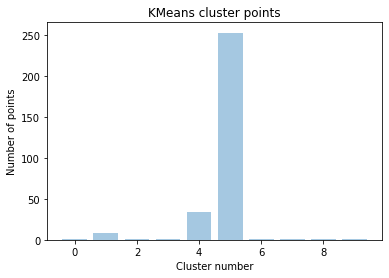

In [42]:
#visualization
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [43]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in final['cleanedtext'].values:
    list_of_sent.append(sent.split())

In [44]:
print(final['cleanedtext'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

i feel lucky found used phone us  used hard all phone line someone upgraded sold one my son liked old one finally fell apart 25 years didnt want upgrade thank seller really appreciate  honesty re said used phonei recommend seller highly  would again
*****************************************************************
['i', 'feel', 'lucky', 'found', 'used', 'phone', 'us', 'used', 'hard', 'all', 'phone', 'line', 'someone', 'upgraded', 'sold', 'one', 'my', 'son', 'liked', 'old', 'one', 'finally', 'fell', 'apart', '25', 'years', 'didnt', 'want', 'upgrade', 'thank', 'seller', 'really', 'appreciate', 'honesty', 're', 'said', 'used', 'phonei', 'recommend', 'seller', 'highly', 'would', 'again']


In [45]:
# removing html tags and apostrophes if present.
import re
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [46]:
i=0
list_of_sent_train=[]
for sent in final['cleanedtext'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

In [47]:
import gensim
# Training the wor2vec model using train dataset
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=100, workers=4)

In [48]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(302, 100)

In [49]:
# Number of clusters to check.
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

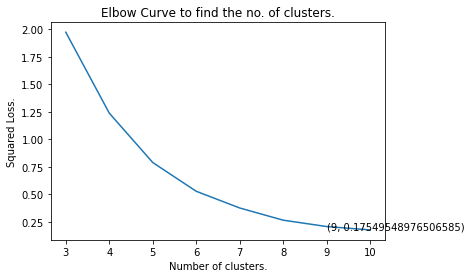

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  0.17549548976506585


In [50]:
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
    
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [51]:
# Training the best model --
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_
word_cluster_center[1:2]

array([[-1.16587752e-02, -6.05652567e-03, -4.07636412e-02,
         3.09837007e-02, -1.00096257e-02, -4.16562952e-02,
        -1.59573478e-02, -4.33931302e-02,  4.62727065e-02,
         4.00684817e-02, -1.37675571e-02, -3.34569911e-02,
         1.59185844e-02,  1.41287498e-02, -2.53364296e-03,
        -3.75405463e-02, -4.03944241e-02, -6.76155525e-03,
        -1.54775893e-02,  7.66690149e-03, -2.15603886e-02,
        -5.91371933e-03, -1.12093440e-03, -1.72636117e-02,
        -7.53230653e-03,  5.15438395e-02, -9.27543410e-06,
        -3.88628649e-03, -1.69216253e-02, -4.16944887e-02,
        -6.54843580e-03,  2.55259320e-03,  9.86673784e-03,
         6.08710008e-03, -2.66823677e-02,  5.19131664e-02,
         2.87810191e-03,  1.29877152e-02, -5.33013703e-04,
         1.13003662e-02, -1.24099652e-02,  1.17031393e-02,
         3.07581107e-02,  1.75755427e-03, -3.91543541e-02,
         3.18421262e-02,  2.57641433e-02,  1.22447662e-02,
         9.13087607e-03, -2.71519573e-02,  1.97074043e-0

In [53]:
dfa = df
dfa['AVG-W2V Clus Label'] = model2.labels_
dfa.head(2)
# How many points belong to each cluster ->
dfa.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


AVG-W2V Clus Label
0    59
1    40
2     2
3    25
4    74
5     8
6    31
7    48
8    15
Name: Reviews, dtype: int64

In [54]:
# Reading a review which belong to each group.
for i in range(optimal_clusters):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(df.iloc[df.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
It works good but it goes slow sometimes but its a very good phone I love it


I originally was using the Samsung S2 Galaxy for Sprint and wanted to return back to the Samsung EPIC 4G for Sprint because I really missed the keyboard, I really liked the smaller compact size of the phone, and I still needed some of the basic functions of a smart phone (i.e. checking e-mail, getting directions, text messaging) Because the phone is not as powerful as the newer cell phones out there, just be aware that the more applications you install the slower the phone runs and will most likely freeze up from time to time. But the camera works great, the video is great as well, and even the web browsing is decent and gives me what I need. I also notice that battery life lasts a little bit longer and charging the phone is much quicker than my Galaxy S2.


______________________________________________

In [55]:
#clustering DBSCAN
from sklearn.cluster import DBSCAN
# Computing 200th Nearest neighbour distance
minPts = 2 * 100
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r: 
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l
def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] 

In [56]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

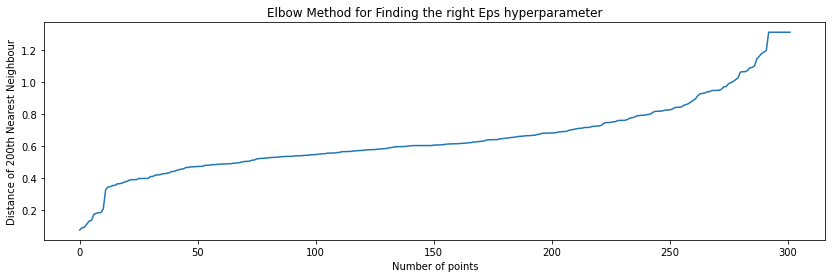

In [57]:
# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [58]:
# Training DBSCAN :
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [59]:
dfdb = dfa
dfdb['AVG-W2V Clus Label'] = model.labels_
dfdb.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,stopwords,lower_case,cleanedtext,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,I feel LUCKY found used (phone us & used hard ...,i feel lucky found used (phone us & used hard ...,i feel lucky found used phone us used hard al...,5,0
21,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"pros-beautiful screen,capable of running chrom...",0.0,"pros-beautiful screen,capable running chrome,t...","pros-beautiful screen,capable running chrome,t...",prosbeautiful screencapable running chrometake...,5,0


In [60]:
dfdb.groupby(['AVG-W2V Clus Label'])['Product Name'].count()

AVG-W2V Clus Label
0    302
Name: Product Name, dtype: int64

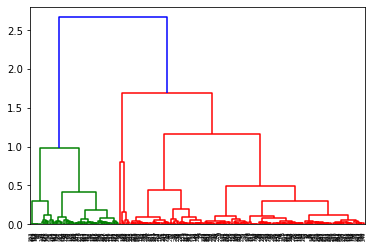

In [61]:
#clustering hierarchical
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)

In [62]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In [63]:
# Giving Labels/assigning a cluster to each point/text 
aggdfa = dfdb
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,stopwords,lower_case,cleanedtext,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,I feel LUCKY found used (phone us & used hard ...,i feel lucky found used (phone us & used hard ...,i feel lucky found used phone us used hard al...,5,1
21,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"pros-beautiful screen,capable of running chrom...",0.0,"pros-beautiful screen,capable running chrome,t...","pros-beautiful screen,capable running chrome,t...",prosbeautiful screencapable running chrometake...,5,1


In [64]:
# How many points belong to each cluster
aggdfa.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0     10
1    145
2     58
3     67
4     22
Name: Reviews, dtype: int64

In [65]:
# Reading a review which belong to each group.
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
The Phone is pretty good. I am using it with a LycaMobile plan. Only thing that is awkward is that the bottom row of letters is off compared to other phones and devices. Before this I had been using a blackberry. When trying to type on the nokia I am always mistyping Ms, Ns and espectially the shift key (which you need to hit to insert any punctuation)


loved everything about it. also it looks like any other touch phone but is not. which makes it stylish yet classic.


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank yo

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

In [ ]:
'''K means classifies the reviews into different clustures. For kmeans, the clusters are clearly reflecting how ther are 
grouped and k means did the best on cluster center top terms.DBSCAN groups all the reviews into one cluster, so it is not best method.
In hierarchical clustering it is difficult to understand type of reviews based on hierarchical formation.
'''